In [2]:
 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
fi_data = pd.read_csv("../data/processed/ethiopia_fi_enriched_data.csv")



In [3]:
# Convert dates
fi_data['observation_date'] = pd.to_datetime(
    fi_data['observation_date'], errors='coerce'
)

# Filter observation records only
observations = fi_data[fi_data['record_type'] == 'observation']


In [4]:
# 1. Missing value analysis
# --------------------------------------------------
missing_summary = observations.isna().mean().sort_values(ascending=False)
print("\nMissing value ratio:")
print(missing_summary)


Missing value ratio:
value_text             1.000000
category               1.000000
evidence_basis         1.000000
impact_estimate        1.000000
region                 1.000000
lag_months             1.000000
related_indicator      1.000000
relationship_type      1.000000
impact_direction       1.000000
impact_magnitude       1.000000
notes                  0.967742
period_end             0.709677
period_start           0.709677
collection_date        0.677419
original_text          0.354839
source_url             0.161290
gender                 0.032258
record_id              0.032258
comparable_country     0.032258
indicator_direction    0.032258
observation_date       0.032258
source_type            0.032258
fiscal_year            0.032258
collected_by           0.032258
location               0.032258
record_type            0.000000
unit                   0.000000
indicator              0.000000
value_numeric          0.000000
pillar                 0.000000
indicator_code    

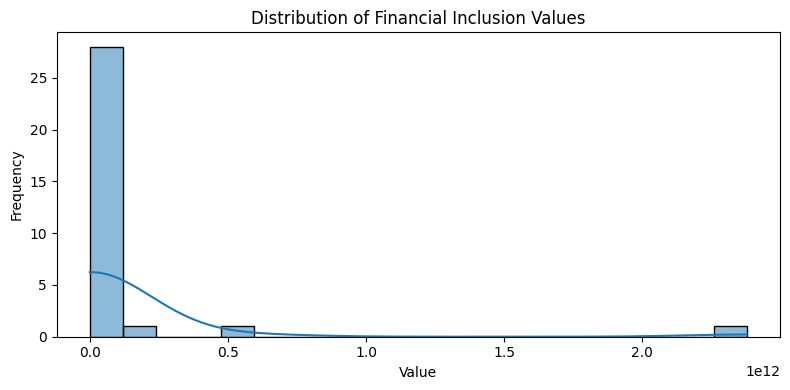

In [3]:
# 2. Distribution of numeric values
# --------------------------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(
    observations['value_numeric'].dropna(),
    bins=20,
    kde=True
)
plt.title("Distribution of Financial Inclusion Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
# 3. Indicator-wise summary statistics
# --------------------------------------------------
indicator_stats = (
    observations
    .groupby('indicator_code')['value_numeric']
    .describe()
)
print("\nIndicator summary statistics:")
print(indicator_stats)


Indicator summary statistics:
                    count          mean           std           min  \
indicator_code                                                        
ACC_4G_COV            2.0  5.415000e+01  2.354666e+01  3.750000e+01   
ACC_FAYDA             3.0  1.166667e+07  3.511885e+06  8.000000e+06   
ACC_MM_ACCOUNT        3.0  8.116667e+00  2.982588e+00  4.700000e+00   
ACC_MOBILE_PEN        1.0  6.140000e+01           NaN  6.140000e+01   
ACC_OWNERSHIP         6.0  4.066667e+01  1.212710e+01  2.200000e+01   
AFF_DATA_INCOME       1.0  2.000000e+00           NaN  2.000000e+00   
GEN_GAP_ACC           2.0  1.900000e+01  1.414214e+00  1.800000e+01   
GEN_GAP_MOBILE        1.0  2.400000e+01           NaN  2.400000e+01   
GEN_MM_SHARE          1.0  1.400000e+01           NaN  1.400000e+01   
USG_ACTIVE_RATE       1.0  6.600000e+01           NaN  6.600000e+01   
USG_ATM_COUNT         1.0  1.193000e+08           NaN  1.193000e+08   
USG_ATM_VALUE         1.0  1.561000e+11       

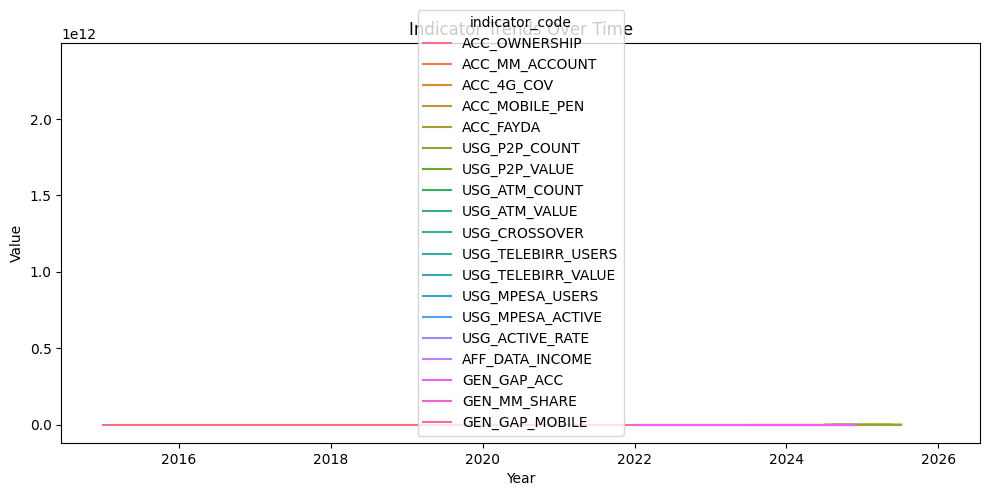

In [7]:
# 4. Time-series trend exploration
# --------------------------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=observations,
    x='observation_date',
    y='value_numeric',
    hue='indicator_code'
)
plt.title("Indicator Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [8]:
# 5. Regional comparison (if available)
# --------------------------------------------------
regional_data = observations.dropna(subset=['region'])

if not regional_data.empty:
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=regional_data,
        x='region',
        y='value_numeric'
    )
    plt.title("Regional Distribution of Financial Inclusion Indicators")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

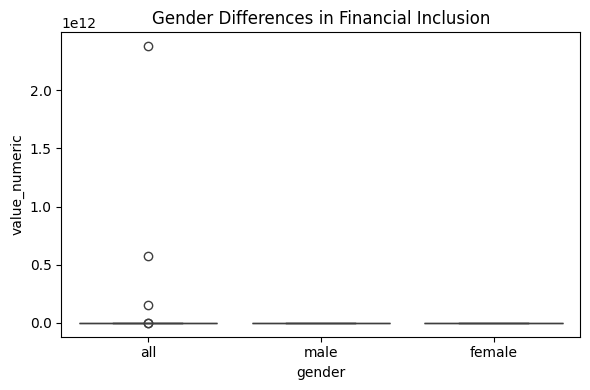

In [9]:
# 6. Gender-based comparison (if available)
# --------------------------------------------------
gender_data = observations.dropna(subset=['gender'])

if not gender_data.empty:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=gender_data,
        x='gender',
        y='value_numeric'
    )
    plt.title("Gender Differences in Financial Inclusion")
    plt.tight_layout()
    plt.show()


## Key Insights

1. Account ownership growth slowed to +3pp (2021–2024) despite rapid mobile money expansion.
2. Mobile money accounts are largely secondary, layered on existing bank accounts.
3. Usage indicators respond faster to events than access indicators.
4. Infrastructure indicators (4G, smartphones) lead usage by ~1–2 years.
5. Policy targets are more ambitious than historical trend suggests.


## Data Limitations

- Only 5 Findex observations over 13 years
- Usage data comes from mixed supply- and demand-side sources
- Event impact magnitudes are assumed, not estimated causally
- Gender and regional disaggregation is limited

